# PH509: Lab 2 Assignment

## **PH509 Lab 2A :**

#Implementation of Euler and Euler-Cromer ODE

## **a)**
Write a function for solving the Newton's laws of motion $$\frac{d^2 x}{dt^2} = a(x, \dot{x}, t),$$ using Euler and Euler-Cromer algorithms. This 2nd order ODE can be broken into a set of 2 coupled 1st order ODEs:

$$ \frac{d}{dt} \begin{pmatrix}x \\ v \end{pmatrix} = \begin{pmatrix} {v} \\ a(x,v,t) \end{pmatrix}$$


**(I) By Euler ODE Algorithm :**

In [ ]:
#importing the necessary libraries :

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# defining a function to calculate the rhs of the given eqn :

def rhs1( xk , vk , tk ) :

  vtk = vk        #(m/sec)
  atk = ak        #(m/sec^2), here the form of acceleration a(x,v,t) is to be used

  dydt = [ vtk , atk ]

  return dydt                  # returns [ v[tk] , a[tk] ]

In [ ]:
# Defining the Euler ODE function :

def EulerODE( initCond , tRange , rhs ):

  # initial conditions
  x0 = initCond[0]
  v0 = initCond[1]

  #time range and time-step
  t0 = tRange[0]             #sec
  tmax = tRange[1]           #sec
  dt = 0.01                  #sec

  #time array :
  t = np.arange( t0 , tmax+dt , dt )

  #array containing the x and v values :
  y_euler = np.zeros( (len(t) , 2) )
  y_euler[0,0] = x0                       # initial condition
  y_euler[0,1] = v0

  for k in np.arange( 0 , len(t) - 1 ):


    # position and velocity at the current step :
    tk = t[k]
    xk = y_euler[k , 0]
    vk = y_euler[k , 1]

    dxdt_k , dvdt_k = rhs( xk , vk , tk )

    #--Euler Steps to advance to the next steps :
    y_euler[k+1 , 0] = xk + dt*dxdt_k
    y_euler[k+1 , 1] = vk + dt*dvdt_k

  return t , y_euler                    #returns an array for time , and an matrix for the values of x & v


**(II) By Euler-Cromer ODE Algorithm :**



In [ ]:
# Defining the EulerCromer ODE function :

def EulerCromerODE( initCond , tRange , rhs ) :

  # initial conditions
  x0 = initCond[0]
  v0 = initCond[1]

  #time range and time-step
  t0 = tRange[0]
  tmax = tRange[1]
  dt = 0.01

  #time array :
  t = np.arange( t0 , tmax+dt , dt )

  #array containing the x and v values :
  y_eulerCromer = np.zeros( (len(t) , 2) )
  y_eulerCromer[0,0] = x0                            #initial condition
  y_eulerCromer[0,1] = v0

  for k in np.arange( 0 , len(t) - 1 ) :

    # position and velocity at the current step :
    tk = t[k]
    xk = y_eulerCromer[k , 0]
    vk = y_eulerCromer[k , 1]

    dxdt_k , dvdt_k = rhs( xk , vk , tk )

    #--EulerCromer Steps to advance to the next steps :
    y_eulerCromer[k+1 , 1] = vk + dt*dvdt_k
    y_eulerCromer[k+1 , 0] = xk + dt*y_eulerCromer[k+1 , 1]

  return t , y_eulerCromer                         #returns an array for time , and an matrix for the values of x & v


##b) Pendulum :

$$\frac{d^2 \theta}{dt^2} =  − k \, sin \theta,$$
with boundary conditions:
at $t = 0$, $\theta = \pi/4, \dot{\theta} = 0$. Note that the initial amplitude is quite large, so it is not really a simple harmonic oscillator.

This 2nd order ODE can be broken into a set of 2 coupled 1st order ODEs:

$$ \frac{d}{dt} \begin{pmatrix}\theta \\ \omega \end{pmatrix} = \begin{pmatrix} \omega \\ -k \,sin\theta \end{pmatrix}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Note that in this problem we are told to use the functions we defined in **Part-(a)** , so here we prior declare that the variables such as $\theta$ , $\omega$ are replaced by $x$ and $v$ respectively in the program :

To avoid any confusion of notations , following is the list of rotational motion variables which are replaced by their translation motion analogues in the program :

$$\theta \rightarrow x$$
$$\omega \rightarrow v$$
$$\frac{d\omega}{dt} \rightarrow \frac{dv}{dt}$$


 For Large Oscillations :

In [ ]:
# Defining RHS for the large oscillations :

def rhs2( xk , vk , tk ):

  k = 1                    #constant

  vtk = vk                 # angular velocity
  atk = -k*np.sin( xk )    # angular acceleration
  dydt = [ vtk , atk ]

  return dydt                  # returns [ v[tk] , a[tk] ]


For Small Oscillations : ($sin\theta \approx \theta$)

In [ ]:
# Defining RHS for the small oscillations :

def rhs3( xk , vk , tk ) :

  k = 1            #constant

  vtk = vk         #angular velocity
  atk = -k*xk      #angular acceleration

  dydt = [ vtk , atk ]

  return dydt                  # returns [ v[tk] , a[tk] ]

(i) Euler ODE solution for Large Oscillations :

In [ ]:
#Calling the EulerODE function for getting the numerical solution in the case of Large Oscillations :
t , y_euler1 = EulerODE( [np.pi/4 , 0] , [ 0 , 15 ] , rhs2 )          # rhs2 - Large Oscillations
print(y_euler1)

[[ 0.78539816  0.        ]
 [ 0.78539816 -0.00707107]
 [ 0.78532745 -0.01414214]
 ...
 [-0.18983236 -0.79661414]
 [-0.1977985  -0.79472719]
 [-0.20574577 -0.79276208]]


No handles with labels found to put in legend.


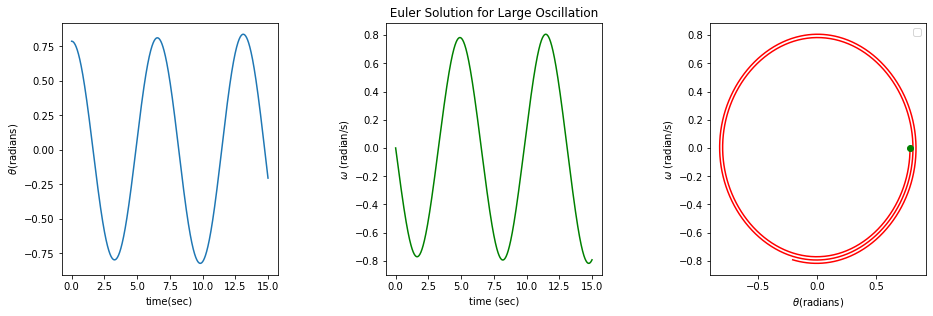

In [ ]:
# plotting for Euler Soln for Large Oscillation :


#theta vs time plot.
plt.figure(figsize = (12 , 4))
plt.subplot(1 , 3 , 1)
plt.plot(t , y_euler1[: , 0],)
plt.xlabel('time(sec)')
plt.ylabel( r'$ \theta $(radians)' )

# plot for angular velocity vs time
plt.subplot(1, 3 , 2)
plt.plot( t , y_euler1[: , 1] , color ='g' , label = 'velocity' )
plt.title( " Euler Solution for Large Oscillation ")
plt.xlabel('time (sec)')
plt.ylabel( r'$\omega$ (radian/s)')


#phase-space plot
plt.subplot(1 , 3 , 3)
plt.plot( y_euler1[: , 0] , y_euler1[: , 1] , color ='r' )
plt.plot(y_euler1[0 , 0], y_euler1[0 , 1], 'go')
plt.xlabel(r'$ \theta $(radians)' )
plt.ylabel(r'$\omega$ (radian/s)')

plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)
plt.legend()
plt.show()


(ii) EulerCromer solution for Large Oscillation :

In [ ]:
#Calling the EulerCromerODE function to get the numerical solution for the Large Oscillation Case :

t , y_eulerCromer1 = EulerCromerODE( [np.pi/4 , 0] , [ 0 , 15 ] , rhs2 )          # rhs2 - Large oscillations
print(y_eulerCromer1)

[[ 0.78539816  0.        ]
 [ 0.78532745 -0.00707107]
 [ 0.78518604 -0.01414164]
 ...
 [-0.21355748 -0.7361465 ]
 [-0.22089775 -0.73402712]
 [-0.22821611 -0.73183606]]


No handles with labels found to put in legend.


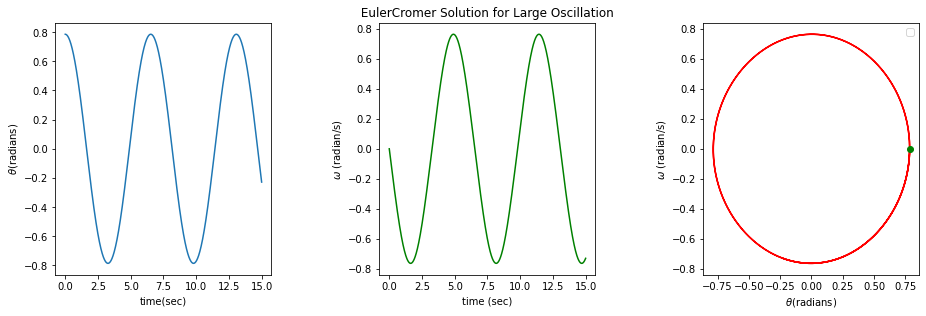

In [ ]:
# plotting for EulerCromer Soln for Large Oscillation :


#theta vs time plot.
plt.figure(figsize = (12 , 4))
plt.subplot(1 , 3 , 1)
plt.plot(t , y_eulerCromer1[: , 0])
plt.xlabel('time(sec)')
plt.ylabel( r'$ \theta $(radians)' )

# plot for angular velocity vs time
plt.subplot(1, 3 , 2)
plt.plot( t , y_eulerCromer1[: , 1] , color ='g' , label = 'velocity' )
plt.title( " EulerCromer Solution for Large Oscillation ")
plt.xlabel('time (sec)')
plt.ylabel(r'$\omega$ (radian/s)')

#phase-space plot
plt.subplot(1 , 3 , 3)
plt.plot( y_eulerCromer1[: , 0] , y_eulerCromer1[: , 1] , color = 'r' )
plt.plot(y_eulerCromer1[0 , 0], y_eulerCromer1[0 , 1], 'go')
plt.xlabel( r'$ \theta $(radians)' )
plt.ylabel(r'$\omega$ (radian/s)')

plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)
plt.legend()
plt.show()

(iii) Euler Solution for Small Oscillation

In [ ]:
#Calling the EulerODE function to get the numerical solution for the small Oscillation Case :

t , y_euler2 = EulerODE( [np.pi/4 , 0] , [ 0 , 15 ] , rhs3 )        # rhs3 - small oscillations

No handles with labels found to put in legend.


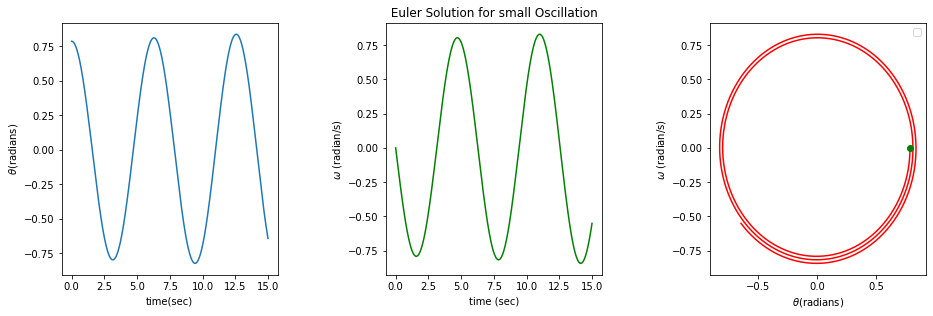

In [ ]:
# plotting for Euler Soln for small Oscillation :


#theta vs t plot.
plt.figure(figsize = (12 , 4))
plt.subplot(1 , 3 , 1)
plt.plot(t , y_euler2[: , 0])
plt.xlabel('time(sec)')
plt.ylabel( r'$ \theta $(radians)' )

# plot for v vs t
plt.subplot(1, 3 , 2)
plt.plot( t , y_euler2[: , 1] , color ='g' , label = 'velocity' )
plt.title( " Euler Solution for small Oscillation ")
plt.xlabel('time (sec)')
plt.ylabel(r'$\omega$ (radian/s)')

#phase space plot
plt.subplot(1 , 3 , 3)
plt.plot( y_euler2[: , 0] , y_euler2[: , 1] , color = 'r' )
plt.plot(y_euler2[0 , 0], y_euler2[0 , 1], 'go')
plt.xlabel( r'$ \theta $(radians)' )
plt.ylabel(r'$\omega$ (radian/s)')

plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)
plt.legend()
plt.show()

(iv) EulerCromer solution for small Oscillation :

In [ ]:
#Calling the EulerCromerODE function to get the numerical solution for the small Oscillation Case :

t , y_eulerCromer2 = EulerCromerODE( [np.pi/4 , 0] , [ 0 , 15 ] , rhs3 )        # rhs3 - small oscillations

No handles with labels found to put in legend.


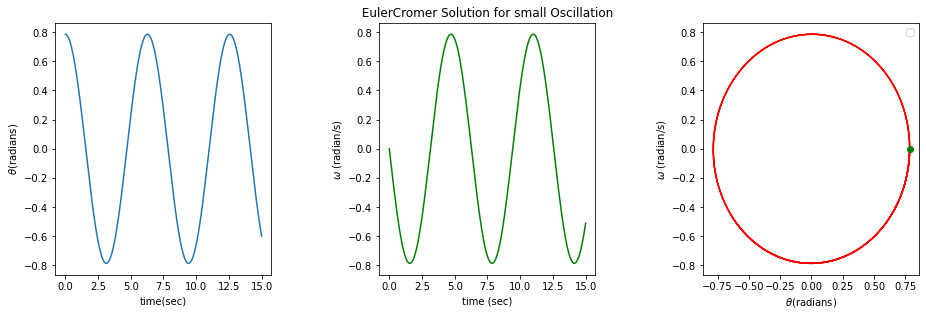

In [ ]:
# plotting for EulerCromer Soln for small Oscillation :


#theta vs t plot.
plt.figure(figsize = (12 , 4))
plt.subplot(1 , 3 , 1)
plt.plot(t , y_eulerCromer2[: , 0])
plt.xlabel('time(sec)')
plt.ylabel(  r'$ \theta $(radians)'  )

# plot for angular velocity vs time
plt.subplot(1, 3 , 2)
plt.plot( t , y_eulerCromer2[: , 1] , color ='g' , label = 'velocity' )
plt.title( " EulerCromer Solution for small Oscillation ")
plt.xlabel('time (sec)')
plt.ylabel(r'$\omega$ (radian/s)')


#phase space plot
plt.subplot(1 , 3 , 3)
plt.plot( y_eulerCromer2[: , 0] , y_eulerCromer2[: , 1] ,color ='r' )
plt.plot(y_eulerCromer2[0 , 0], y_eulerCromer2[0 , 1], 'go')
plt.xlabel( r'$ \theta $(radians)' )
plt.ylabel(r'$\omega$ (radian/s)')

plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)
plt.legend()
plt.show()

##**(C) Total Energy**

For large Amplitude, Total Energy is:
( Taking the values for constants as k = l = g = 1.0 )
$$E = \frac{1}{2}\dot{\theta}^2 + (1 - \cos\theta) $$

Text(0, 0.5, 'Total Energy')

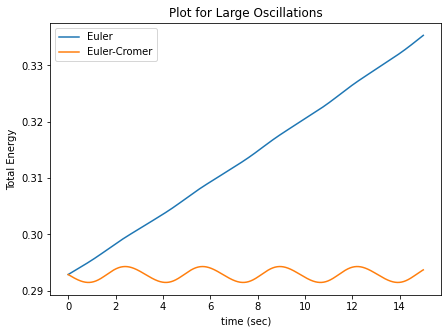

In [ ]:
# For Large Oscillations :

plt.figure(figsize=(7,5))

energy_euler = (1 - np.cos(y_euler1[:,0])) + 0.5*y_euler1[:, 1]**2
energy_eulerCromer = (1 - np.cos(y_eulerCromer1[:,0])) + 0.5*y_eulerCromer1[:, 1]**2

plt.plot(t, energy_euler, label='Euler')
plt.plot(t, energy_eulerCromer, label='Euler-Cromer')
plt.title('Plot for Large Oscillations')
plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('Total Energy')

**Remark:** From above graph, we observe that, for Euler algorithm, our total energy is increasing with time. since we have used Euler's method which is not a symplectic method. Total energy of given system is not conserved and is increasing consistently with time. hence, Euler Method is not suitable for solving this system.

On the other hand, we observe that, for Euler-cromer Method, our Total energy is oscillating back and forth under some bounded region. Since, Euler-Cromer method is a symplectic method of order one. Total energy is although not conserved but is bounded to some finite region. Euler-Cromer method is somewhat more accurate than Euler's method. But, if considered higher-order, the method can give more accurate results.

Text(0, 0.5, 'Total Energy')

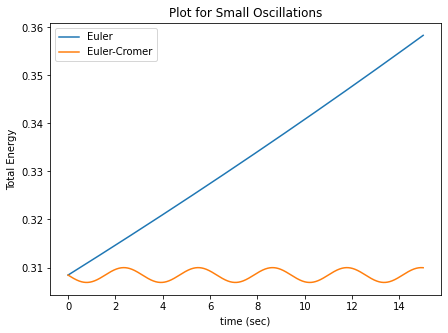

In [ ]:
# For Small Oscillations :

plt.figure(figsize=(7,5))

energy_euler = 0.5*y_euler2[:, 1]**2 + 0.5*y_euler2[:, 0]**2
energy_eulerCromer = 0.5*y_eulerCromer2[:, 1]**2 + 0.5*y_eulerCromer2[:, 0]**2

plt.plot(t, energy_euler, label='Euler')
plt.plot(t, energy_eulerCromer, label='Euler-Cromer')
plt.title('Plot for Small Oscillations')
plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('Total Energy')

## PH509 Lab 2B :

## Part (A) :Jacobian of Simple Harmonic Oscillator for Euler and Euler-Cromer Algorithm
The Euler and Euler-Cromer Algorithms define a map from the $n^{th} \rightarrow (n+1)^{th} $ time steps.
The dynamics of points of a given system is specified once we define a Hamiltonian function $H(q, p)$. The evolution of points $(q,p)$ is given by
$$\frac{dq}{dt} = \frac{\partial H}{\partial p }$$
$$\frac{dp}{dt} = -\frac{\partial H}{\partial q }$$
For the Simple Harmonic Oscillator, $H(q,p) = \frac{1}{2}(p^2 + q^2)$ \\

$\Rightarrow$
$\frac{\partial H}{\partial p} = p$ ;
$\frac{\partial H}{\partial q} = q$
\
$\Rightarrow$
$$\frac{dq}{dt} =  p $$
$$\frac{dp}{dt} = -q $$

**Euler's Method:** \\
$q_{i+1} = q_{i} + p_{i}\Delta t$ \\
$p_{i+1} = p_{i} - q_{i}\Delta t$

$\Rightarrow$
\begin{equation}
\begin{pmatrix}
q_{i+1} \\
p_{i+1} \\
\end{pmatrix}
=
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\begin{pmatrix}
q_{i} \\
p_{i} \\
\end{pmatrix}
\end{equation}

hence, the Jacobian(**J**, say) for this algorithm is,

$\Rightarrow$
\begin{equation}
J_{Euler}
=
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\end{equation}

**Euler-Cromer's Method** \\

$q_{i+1} = q_{i} + p_{i+1}\Delta t$ \\
$p_{i+1} = p_{i} - q_{i}\Delta t$ \\
from this, we get

$\Rightarrow$
\begin{equation}
\begin{pmatrix}
q_{i+1} \\
p_{i+1} \\
\end{pmatrix}
=
\begin{pmatrix}
1 - \Delta t^2 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\begin{pmatrix}
q_{i} \\
p_{i} \\
\end{pmatrix}
\end{equation}

we found Jacobian for this algorithm,

$\Rightarrow$
\begin{equation}
J_{Cromer}
=
\begin{pmatrix}
1 - \Delta t^2 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\end{equation}

It is necessary to solve some particular equation of motions, in such a way that the total energy of the system remains conserved throughout the evolution. There are algorithms which provide base for such conditions to be satisfied. Method to implement such algorithms are called **Symplectic method**. It belongs to the larger class of geometric numerical integration algorithms. These algorithms are constructed so that they preserve certain geometrical properties inherent in the system. Symplectic methods are so
named because, when applied to problems in Hamiltonian
mechanics, the algorithms preserve the linear symplectic
structure inherent in the phase space representation of the
dynamics.  
we test for symplecticity to know if certain system preserves energy and inherent Geometrical properties of the system.
it follows:
If a Jacobian Matrix($J$, say) of some "method" of a particular system which maps the system from $n^{th} \rightarrow (n+1)^{th} $ time steps and if $J^T \Omega J$ = $\Omega$ satisfies, then that method is a symplectic method.
where, \begin{equation}
\Omega
=
\begin{pmatrix}
0 & I_n \\
-I_n  & 0 \\
\end{pmatrix}
\end{equation}
$J$ and $\Omega$ are $2n \times 2n$ matrix and $I_n$ is a $n \times n$ Identity matrix.  


Let's check symplecticity for above given methods. \\
**Euler Method:**
\begin{equation}
J_{Euler}
=
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\end{equation}
Now, checking if
$J^T \Omega J = \Omega$ \\
$\Rightarrow$
\begin{equation}
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}^T
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 1+\Delta t^2 \\
-(1+\Delta t^2) & 1 \\
\end{pmatrix}
\end{equation}
Hence, Euler method is not a symplectic method.

**Euler-Cromer Method:**
\begin{equation}
J_{Cromer}
=
\begin{pmatrix}
1 - \Delta t^2 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
\end{equation}
Now, checking if
$J^T \Omega J = \Omega$ \\
$\Rightarrow$
\begin{equation}
\begin{pmatrix}
1 - \Delta t^2 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}^T
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
\begin{pmatrix}
1 - \Delta t^2 & \Delta t \\
-\Delta t & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
\end{equation}
Hence, Euler-Cromer method is a symplectic method.
Since, Euler Algorithm is not a symplectic method. It does not conserve Total energy. For oscillatory systems such as the harmonic oscillator, the
numerical solution that is obtained with this method diverges
with each iteration from the true solution.
Thus, Euler algorithm is not suitable for solving the Newton's equations of motion.

###Part(B)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Polygon

###Euler's Method

In [ ]:
#Initial Condition arrays
x0 = [1, 10, 10, 1]           # Four Different Initial condition of position
v0 = [0, 0, 10, 10]           # Four Different Initial condition of position

In [ ]:
#Defining Function for the RHS of given system/equation
def dydt(tk, xk, vk):
  k = 1.                      #  Taking constants(Spring's constant, mass) equal to 1
  m = 1.

  dxdt = vk
  dvdt = -(k/m) * xk          # for simple Harmonic Oscillator

  dydt = [dxdt, dvdt]

  return dydt

In [ ]:
# time-range and time-step:
dt = 0.01                      #sec
T = 15.0                       #sec
t = np.arange(0, T+dt, dt)     #sec

In [ ]:
#Defining Euler ODE function with parameters a = {Initial condition of position} and b = {Initial condition of velocity}
def EulerODE(a, b) :
  dt = 0.01
  T = 15.0
  t = np.arange(0, T+dt, dt)
  y_euler = np.zeros((len(t), 2))

  #-- boundary condition
  y_euler[0, 0] = a
  y_euler[0, 1] = b

  for k in np.arange(0, len(t)-1):

    tk, xk, vk = t[k], y_euler[k, 0], y_euler[k, 1]            # assigning time, position and velocity respectively

    dxdt_k, dvdt_k = dydt(tk, xk, vk)

    #-- Euler step
    y_euler[k+1, 0] = xk + dt*dxdt_k  # position
    y_euler[k+1, 1] = vk + dt*dvdt_k  # velocity

    #print (k, y_euler[k+1, 0], y_euler[k+1, 1])
  return t, y_euler                                            #  returns an array for time and matrix consisting x and v

In [ ]:
#Defining a 3D matrix for Euler's Method of size n x 2 x 4     # n = length of time matrix, 2 = each column for x and v, 4 = Four initial conditions
DDD = np.zeros((len(t), 2, 4))
for i in range(0, 4):
  tim, Eode = EulerODE(x0[i], v0[i])              # calling Euler ODE function

  T = tim
  DDD[:, :, i] = Eode

In [ ]:
#defining a function for calculating area of polygon
def polygonArea(X, Y, n):

    # Initialze area
    area = 0.0

    # Calculate value of shoelace formula
    j = n - 1
    for i in range(0,n):
        area += (X[j] + X[i]) * (Y[j] - Y[i])
        j = i   # j is previous vertex to i


    # Return absolute value
    return int(abs(area / 2.0))

Text(0, 0.5, 'v (in m/s)')

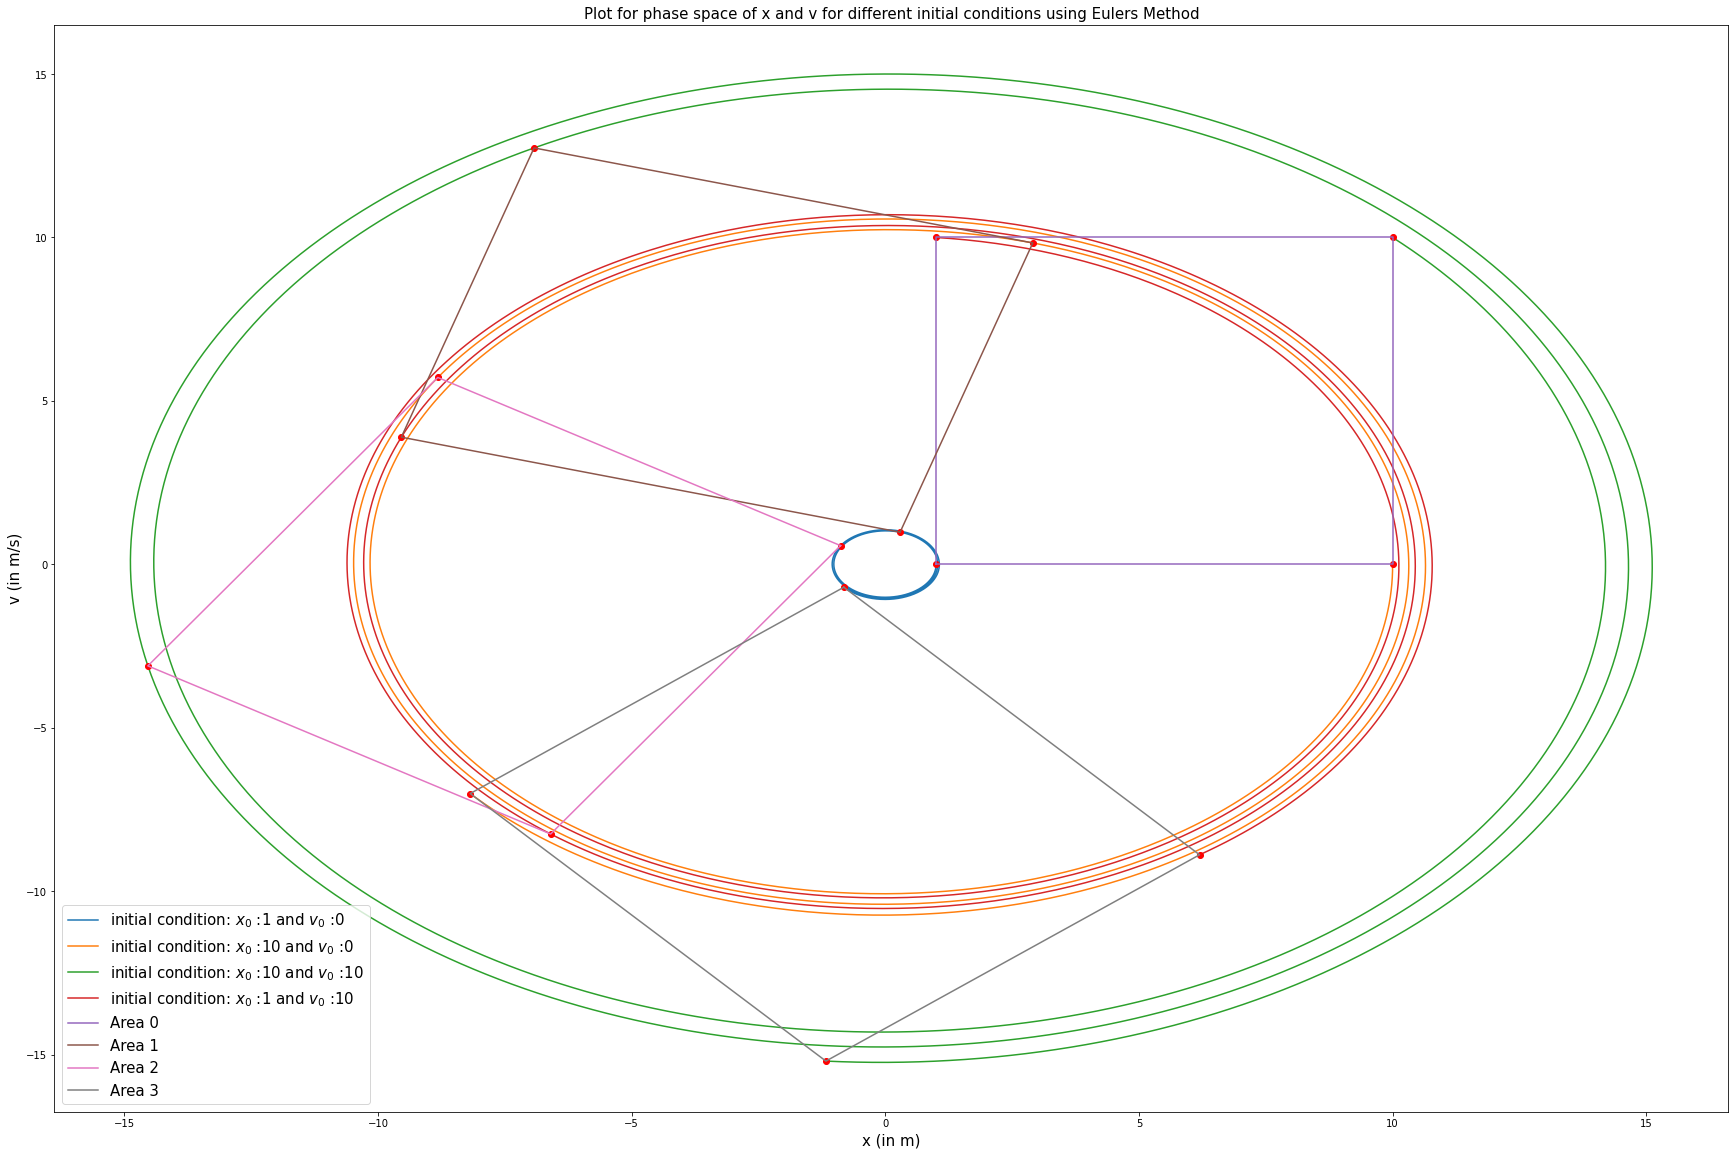

In [ ]:
plt.figure( figsize= ( 30, 20 ))
for p in range(0, 4):
  plt.plot(DDD[:, 0, p], DDD[:, 1, p], label = 'initial condition: $x_0$ :' + str(x0[p]) + ' and $v_0$ :' + str(v0[p])  )
  plt.plot(x0[p], v0[p], 'ro')
  for k in (500, 1000, 1500):
    plt.plot(DDD[k, 0, p], DDD[k, 1, p], 'ro')
    coord = [[x0[i], v0[i]] for i in range(0,4)]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

#lists of points x and v (from Euler 3D matrix defined above) for time t = 500, 1000, 1500 for four different initial conditions taken above
x11 = (DDD[500, 0, 0], DDD[500, 0, 1], DDD[500, 0, 2], DDD[500, 0, 3], DDD[500, 0, 0])
v11 = (DDD[500, 1, 0], DDD[500, 1, 1], DDD[500, 1, 2], DDD[500, 1, 3], DDD[500, 1, 0])
x12 = (DDD[1000, 0, 0], DDD[1000, 0, 1], DDD[1000, 0, 2], DDD[1000, 0, 3], DDD[1000, 0, 0])
v12 = (DDD[1000, 1, 0], DDD[1000, 1, 1], DDD[1000, 1, 2], DDD[1000, 1, 3], DDD[1000, 1, 0])
x13 = (DDD[1500, 0, 0], DDD[1500, 0, 1], DDD[1500, 0, 2], DDD[1500, 0, 3], DDD[1500, 0, 0])
v13 = (DDD[1500, 1, 0], DDD[1500, 1, 1], DDD[1500, 1, 2], DDD[1500, 1, 3], DDD[1500, 1, 0])


u = len(x11)
plt.plot(xs, ys, label = 'Area 0')
plt.plot(x11, v11, label = 'Area 1')
plt.plot(x12, v12, label = 'Area 2')
plt.plot(x13, v13, label = 'Area 3')
plt.title( 'Plot for phase space of x and v for different initial conditions using Eulers Method', fontsize = 15)
plt.legend(prop={"size":15})
plt.xlabel('x (in m)', fontsize = 15)
plt.ylabel('v (in m/s)', fontsize = 15)

In [ ]:
print("Area 0 at time t = 0:",polygonArea(x0, v0, u-1))
print("Area 1 at time t = 500:",polygonArea(x11, v11, u-1))
print("Area 2 at time t = 1000:",polygonArea(x12, v12, u-1))
print("Area 3 at time t = 1500:",polygonArea(x13, v13, u-1))

Area 0 at time t = 0: 90
Area 1 at time t = 500: 94
Area 2 at time t = 1000: 99
Area 3 at time t = 1500: 104


**Remark:** Clearly, we can see from above output that the area of rectangle grows as the system evolve with time. it violates the liouville's theorem, which states that the density of system points, here Area, in the vicinity of a given system point, here initial conditions, traveling through phase-space is constant with time.   

###Euler-Cromer Method

In [ ]:
#Initial Condition Matrix
dt = 0.01                     #sec
T = 15.0                      #sec
t = np.arange(0, T+dt, dt)    #sec

In [ ]:
#Defining Cromer ODE function with parameters a = {Initial condition of position} and b = {Initial condition of velocity}
def CromerODE(a, b) :
  dt = 0.01
  T = 15.0
  t = np.arange(0, T+dt, dt)
  y_eulerCromer = np.zeros((len(t), 2))

  y_eulerCromer[0, 0] = a
  y_eulerCromer[0, 1] = b

  for k in np.arange(0, len(t)-1):

    #-- position and velocity at current step
    tk, xk, vk = t[k], y_eulerCromer[k, 0], y_eulerCromer[k, 1]                # assigning time, position and velocity respectively

    #-- derivatives at current step
    dxdt_k, dvdt_k = dydt(tk, xk, vk)

    #-- Euler-Cromer step to advance to the next step
    y_eulerCromer[k+1, 1] = vk + dt*dvdt_k  # velocity update first
    y_eulerCromer[k+1, 0] = xk + dt*y_eulerCromer[k+1, 1]  # position update based on velocity update
  return t, y_eulerCromer                                  #returns an array for time and matrix consisting x and v

In [ ]:
#Defining a 3D matrix for Euler's Method of size n x 2 x 4     # n = length of time matrix, 2 = each column for x and v, 4 = Four initial conditions
Cmat = np.zeros((len(t), 2, 4))
for i in range(0, 4):
  timee, Code = CromerODE(x0[i], v0[i])         # Calling Cromer ODE

  Ti = timee
  Cmat[:, :, i] = Code

Text(0, 0.5, 'v (in m/s)')

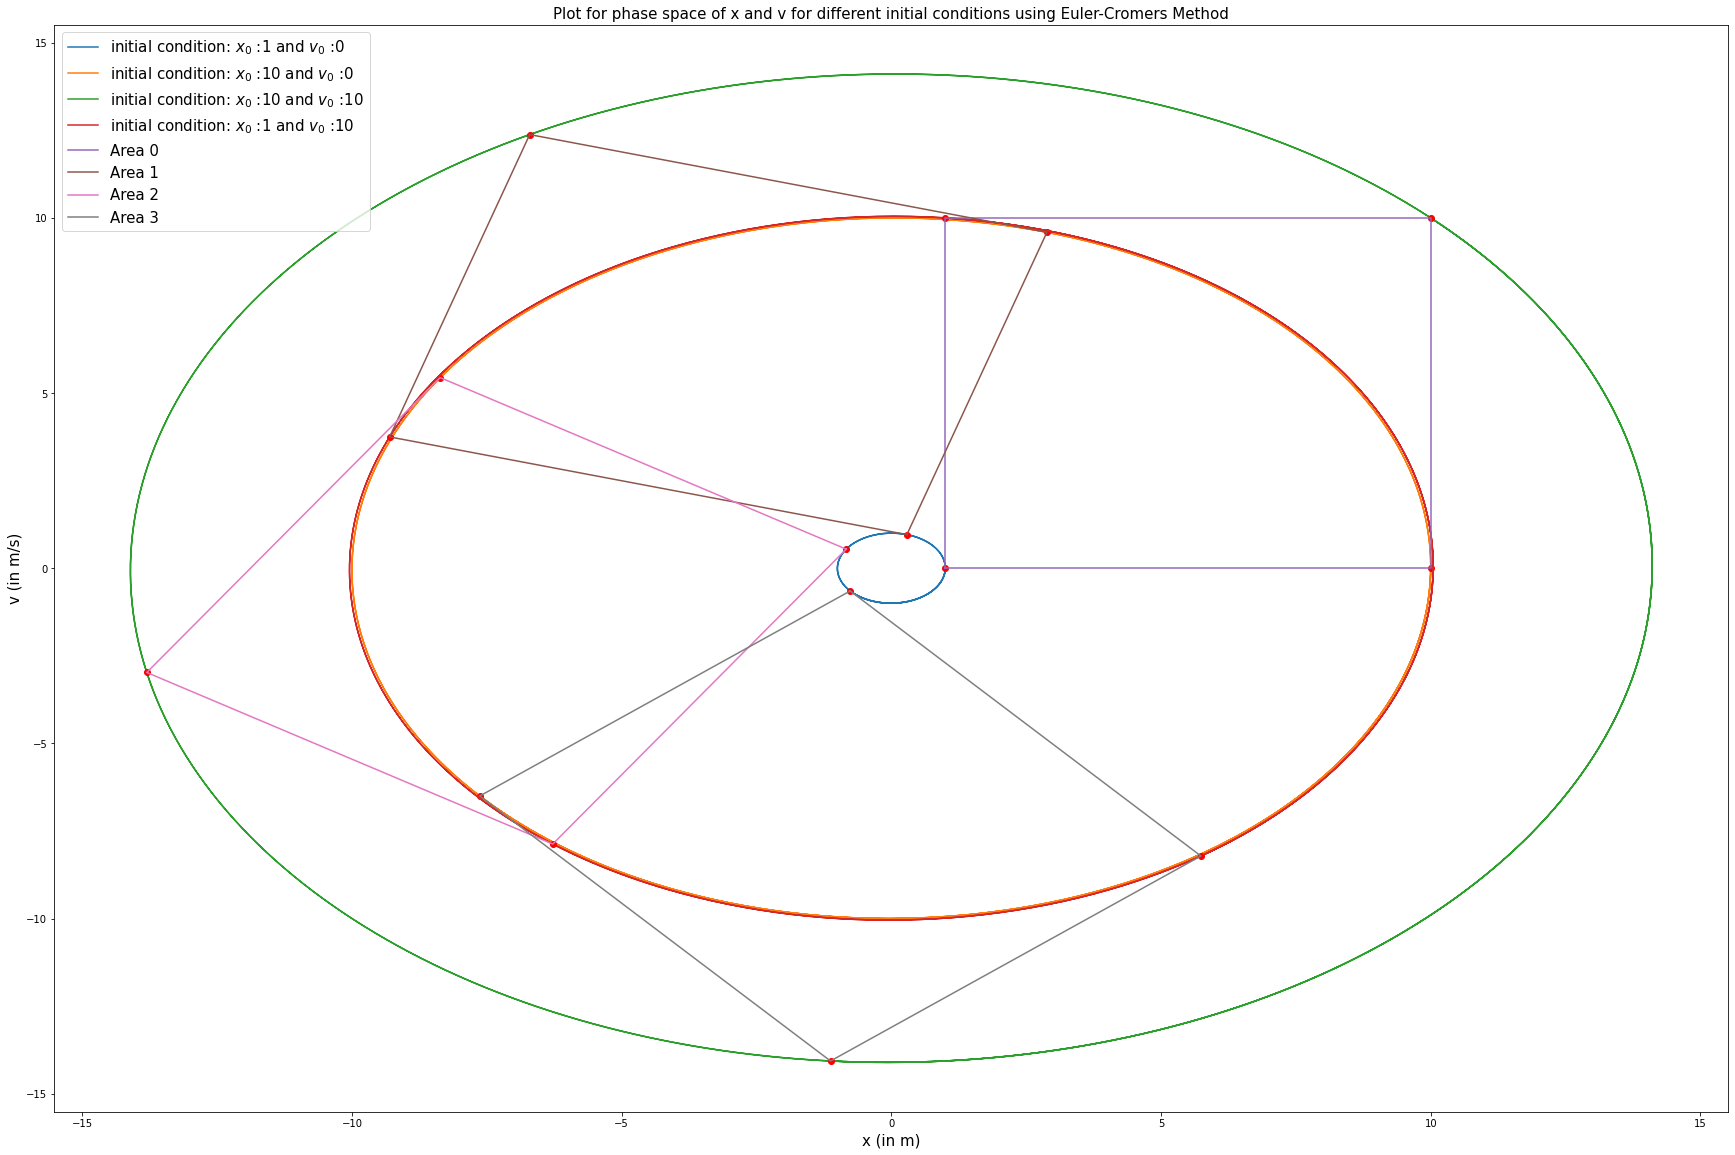

In [ ]:
plt.figure( figsize= ( 30, 20 ))
for p in range(0, 4):
  plt.plot(Cmat[:, 0, p], Cmat[:, 1, p], label = 'initial condition: $x_0$ :' + str(x0[p]) + ' and $v_0$ :' + str(v0[p]))
  plt.plot(x0[p], v0[p], 'ro')
 # if t == np.logical_or(500, 1000, 1500):
  for k in (500, 1000, 1500):
    plt.plot(Cmat[k, 0, p], Cmat[k, 1, p], 'ro')
    coord = [[x0[i], v0[i]] for i in range(0,4)]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

#   xs, ys = zip(*coord) #create lists of x and y values

#lists of points x and v (from Cromer 3D matrix defined above) for time t = 500, 1000, 1500 for four different initial conditions taken above
x21 = (Cmat[500, 0, 0], Cmat[500, 0, 1], Cmat[500, 0, 2], Cmat[500, 0, 3], Cmat[500, 0, 0])
v21 = (Cmat[500, 1, 0], Cmat[500, 1, 1], Cmat[500, 1, 2], Cmat[500, 1, 3], Cmat[500, 1, 0])
x22 = (Cmat[1000, 0, 0], Cmat[1000, 0, 1], Cmat[1000, 0, 2], Cmat[1000, 0, 3], Cmat[1000, 0, 0])
v22 = (Cmat[1000, 1, 0], Cmat[1000, 1, 1], Cmat[1000, 1, 2], Cmat[1000, 1, 3], Cmat[1000, 1, 0])
x23 = (Cmat[1500, 0, 0], Cmat[1500, 0, 1], Cmat[1500, 0, 2], Cmat[1500, 0, 3], Cmat[1500, 0, 0])
v23 = (Cmat[1500, 1, 0], Cmat[1500, 1, 1], Cmat[1500, 1, 2], Cmat[1500, 1, 3], Cmat[1500, 1, 0])

plt.plot(xs, ys, label = 'Area 0')
plt.plot(x21, v21, label = 'Area 1')
plt.plot(x22, v22, label = 'Area 2')
plt.plot(x23, v23, label = 'Area 3')

plt.title( 'Plot for phase space of x and v for different initial conditions using Euler-Cromers Method', fontsize =15)
plt.legend(prop={"size":15})
plt.xlabel('x (in m)', fontsize = 15)
plt.ylabel('v (in m/s)', fontsize = 15)

In [ ]:
print("Area 0 at time t = 0:",polygonArea(x0, v0, u-1))
print("Area 1 at time t = 500:",polygonArea(x21, v21, u-1))
print("Area 2 at time t = 1000:",polygonArea(x22, v22, u-1))
print("Area 3 at time t = 1500:",polygonArea(x23, v23, u-1))

Area 0 at time t = 0: 90
Area 1 at time t = 500: 90
Area 2 at time t = 1000: 89
Area 3 at time t = 1500: 90


**Remark:** Clearly, we can see from above output that the area of rectangle is constant with time. It follows the liouville's theorem, which states that the density of system points, here Area, in the vicinity of a given system point, here initial conditions, traveling through phase-space is constant with time.   
Also, A numerical method that preserves any (weighted) area does not spiral.

# **PH509 Lab 2C :**

## Linearly-damped harmonic oscillator :

    

The Linearly damped Harmonic oscillator follows the $2^{nd}$ order Differential Equation of the form given as :

$$\frac{d^2x}{dt^2}= −\frac{k}{m}x -bv$$

Here , the damping effect is due to a linear term $-bv$, which corresponds to the drag force that is proportional to the linear velocity $v$.

The resulting system is called a damped harmonic oscillator, and $b$ (if positive) is the damping constant.

The above equation can be represented explicitly in the below form :

$$
\frac{d}{dt}
\begin{bmatrix}
x \\
v
\end{bmatrix}
=
\begin{bmatrix}
v \\
-\frac{k}{m}x - bv
\end{bmatrix}
$$

Now let us solve the given system of The Linearly damped Harmonic oscillator by Euler method and Euler Cromer method .

#Part (a) :

In [ ]:
# importing necessary libraries :
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defining RHS for the given problem :

def rhsDamped( xk , vk , tk , b ):

  k = 1                    #constant
  m = 1                    # kg (mass)
  vtk = vk                 # m/sec
  atk = -(k/m)*(xk) - (b*vk)   # m/sec^2

  dydt = [ vtk , atk ]

  return dydt                  # returns [ v[tk] , a[tk] ]

**Defining the Euler Function :**

In [ ]:
# Defining the Euler ODE function :

def EulerODE( initCond , tRange , rhs , b ):

  # initial conditions :
  x0 = initCond[0]
  v0 = initCond[1]

  #time range and time step
  t0 = tRange[0]
  tmax = tRange[1]
  dt = 0.01             # time step
  t = np.arange( t0 , tmax+dt , dt )

  #array containing the  position and velocity
  y_euler = np.zeros( (len(t) , 2) )
  y_euler[0,0] = x0
  y_euler[0,1] = v0

  for k in np.arange( 0 , len(t) - 1 ):


    # position and velocity at the current step :
    tk = t[k]
    xk = y_euler[k , 0]
    vk = y_euler[k , 1]

    dxdt_k , dvdt_k = rhs( xk , vk , tk , b )

    #--Euler Steps to advance to the next steps :
    y_euler[k+1 , 0] = xk + dt*dxdt_k
    y_euler[k+1 , 1] = vk + dt*dvdt_k

  return t , y_euler                          #returns an array for time , and an matrix for the values of x & v



**Defining the Euler Cromer Function :**

In [ ]:
# Defining the EulerCromer ODE function :

def EulerCromerODE( initCond , tRange , rhs , b ) :

  x0 = initCond[0]
  v0 = initCond[1]

  t0 = tRange[0]
  tmax = tRange[1]
  dt = 0.001
  t = np.arange( t0 , tmax+dt , dt )

  y_eulerCromer = np.zeros( (len(t) , 2) )
  y_eulerCromer[0,0] = x0
  y_eulerCromer[0,1] = v0

  for k in np.arange( 0 , len(t) - 1 ) :

    # position and velocity at the current step :
    tk = t[k]
    xk = y_eulerCromer[k , 0]
    vk = y_eulerCromer[k , 1]

    dxdt_k , dvdt_k = rhs( xk , vk , tk , b )

    #--EulerCromer Steps to advance to the next steps :
    y_eulerCromer[k+1 , 1] = vk + dt*dvdt_k
    y_eulerCromer[k+1 , 0] = xk + dt*y_eulerCromer[k+1 , 1]

  return t , y_eulerCromer


Defining the plot function for plotting the graphs  for solutions found using the Euler Method :

In [ ]:
def pl1( t , sol , b  ) :
  plt.figure(figsize = (12,4))

  # plot for x vs t
  plt.subplot(1, 3 , 1)
  plt.plot( t , sol[:,0] , color ='b' , label = 'amplitude' )
  plt.title( " Euler Solution for b = " +str(b))
  plt.xlabel('time (sec)')
  plt.ylabel('position(m)')

  # plot for v vs t
  plt.subplot(1, 3 , 2)
  plt.plot( t , sol[:,1] , color ='g' , label = 'velocity' )
  plt.title( " Euler Solution for b = " +str(b))
  plt.xlabel('time (sec)')
  plt.ylabel('velocity(m/s)')


  #plot for  phase space trajectory :
  plt.subplot(1, 3 , 3)
  plt.plot( sol[:,0] , sol[ : , 1] , color ='r'  )
  plt.title( " Euler Solution for b = " +str(b))
  plt.xlabel('position (m)')
  plt.ylabel('velocity (m/s)')
  plt.plot(sol[0 , 0], sol[0 , 1], 'go')
  plt.xlim(-1.5 , 2.5)
  plt.ylim(-1 , 0.75)

  plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)

  plt.show()

Defining the plot function for plotting the graphs  for solutions found using the EulerCromer Method :

In [ ]:
def pl2( t , sol , b  ) :
  plt.figure(figsize = (12,4))

  # plot for x vs t
  plt.subplot(1, 3 , 1)
  plt.plot( t , sol[:,0] , color ='b' , label = 'amplitude' )
  plt.title( " EulerCromer Solution for b = " +str(b))
  plt.xlabel('time (sec)')
  plt.ylabel('position(m)')

  # plot for v vs t
  plt.subplot(1, 3 , 2)
  plt.plot( t , sol[:,1] , color ='g' , label = 'velocity' )
  plt.title( " EulerCromer Solution for b = " +str(b))
  plt.xlabel('time (sec)')
  plt.ylabel('velocity(m/s)')


  #plot for  phase space trajectory :
  plt.subplot(1, 3 , 3)
  plt.plot( sol[:,0] , sol[ : , 1] , color ='r'  )
  plt.title( " EulerCromer Solution for b = " +str(b))
  plt.xlabel('position (m)')
  plt.ylabel('velocity (m/s)')
  plt.plot(sol[0 , 0], sol[0 , 1], 'go')
  plt.xlim(-1.5 , 1.5)
  plt.ylim(-1 , 0.75)

  plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=0)
  plt.show()

Now , we consider different values of $b$ , which is related to the Quality factor of osillator by the relation , $b = 1/Q $ .

Note that ,  A system with $Q = 1/2$ (or $b = 2$) is **critically damped**, and smaller values of $Q$ (or $b > 2$) do not oscillate, but they rapidly approach the origin , called **overdamped** and for $b<2$ the system is called to be **underdamped** .

 Here , we to verify the above behaviour by taking the values of $b$ as $ 0.5$ $(b<2)$ ,  $2.0$  $(b=2)$ and $ 2.5$ $(b>2) $ using both the methods .


**For Euler Method :**

UnderDamped Osillation (b < 2)


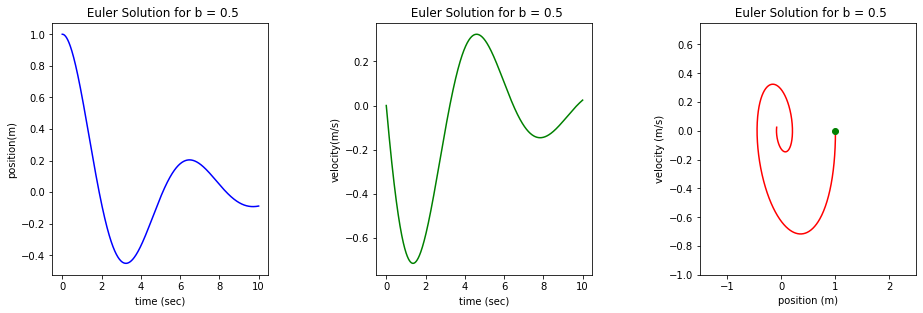

Critically Damped Osillation (b = 2)


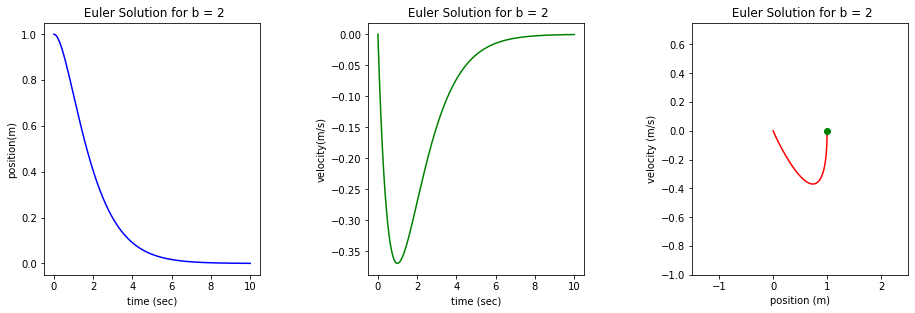

OverDamped Osillation (b > 2)


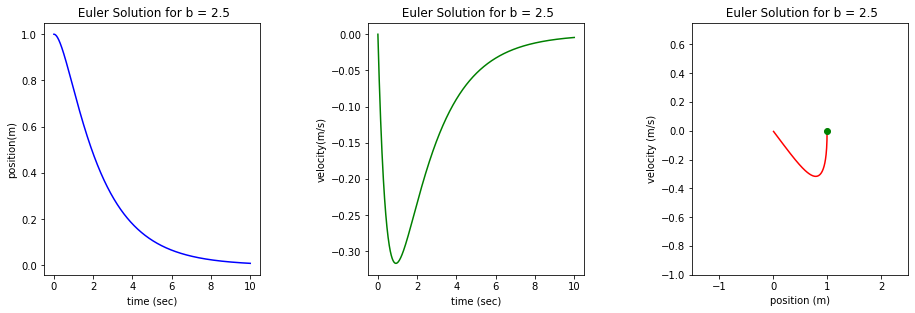

In [ ]:
# Calling the EulerODE function and the pl1 function for the plotting of the required graphs and Trajectories :

for i in  [ 0.5 , 2 , 2.5] :       ## for different values of b( placed  in the given list )

  if i < 2 :
    print('UnderDamped Osillation (b < 2)')
    t , y_euler = EulerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl1( t , y_euler , i )
  if i == 2 :
    print('Critically Damped Osillation (b = 2)')
    t , y_euler = EulerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl1( t , y_euler , i )
  if i > 2 :
    print('OverDamped Osillation (b > 2)')
    t , y_euler = EulerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl1( t , y_euler , i )


**For EulerCromer Method :**

UnderDamped Osillation (b < 2)


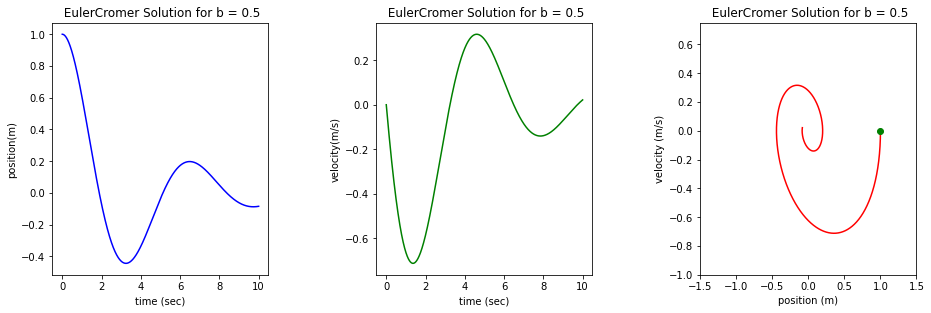

Critically Damped Oscillations (b = 2)


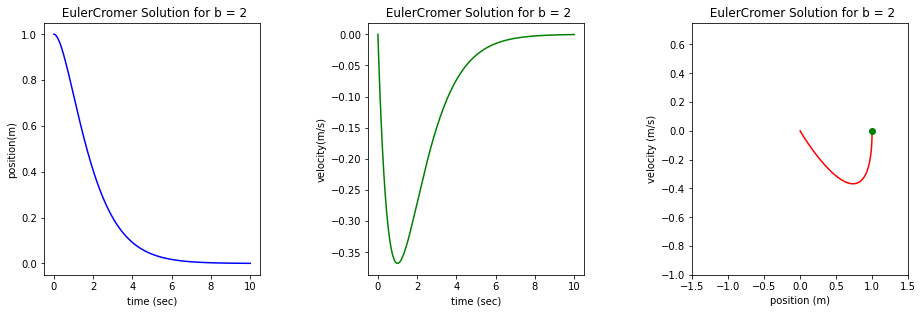

OverDamped Oscillations (b > 2)


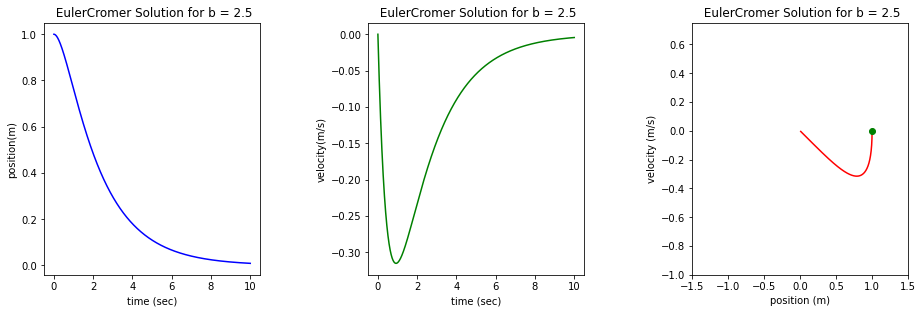

In [ ]:
for i in  [ 0.5 , 2 , 2.5] :               ## for different values of b( placed  in the given list )
  if i < 2 :
    print('UnderDamped Osillation (b < 2)')
    t , y_eulerCromer = EulerCromerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl2( t , y_eulerCromer , i )
  if i==2 :
    print('Critically Damped Oscillations (b = 2)')
    t , y_eulerCromer = EulerCromerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl2( t , y_eulerCromer , i )
  if i > 2 :
    print('OverDamped Oscillations (b > 2)')
    t , y_eulerCromer = EulerCromerODE( [ 1 , 0 ] , [ 0 , 10 ] , rhsDamped , i )
    pl2( t , y_eulerCromer , i )

#Part (b) :

Here , we have a $2^{nd}$ order Differential Equation of the form :   $$\frac{d^2x}{dt^2}= −\frac{k}{m}x -bv$$

The above equation can be represented explicitly in the below form :

$$
\frac{d}{dt}
\begin{bmatrix}
x \\
v
\end{bmatrix}
=
\begin{bmatrix}
v \\
-\frac{k}{m}x - bv
\end{bmatrix}
$$

Now , in the case of a **Damped Simple Harmonic Oscillator** ( SHO ), the tranformation equations in **Euler method**(First Order Method) are obtained as:

$$x_{n+1} = x_n + v_{n}\Delta t$$
$$v_{n+1} = v_n -x_{n} \frac{k}{m} \Delta t - bv_n \Delta t$$

The Jacobian of this transformation is given by:

$$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix} = \begin{pmatrix} 1 & \Delta t \\ -\frac{k}{m} \Delta t & 1 - b\Delta t\end{pmatrix}$$

$$\therefore Det(J) = 1- b\Delta t+\frac{k}{m} \Delta t^2$$

Similarly , in the case of **Euler-Cromer Method** , the transformation equations are of the form :

$$x_{n+1} = x_n + v_{n+1}\Delta t$$
$$v_{n+1} = v_n -x_{n} \frac{k}{m} \Delta t-bv_n \Delta t$$

The Jacobian of this transformation is given by:

$$J = \begin{pmatrix} {\frac{\partial x_{n+1}}{\partial x_{n}}} & {\frac{\partial x_{n+1}}{\partial v_{n}}}\\ {\frac{\partial v_{n+1}}{\partial x_{n}}} & {\frac{\partial v_{n+1}}{\partial v_{n}}} \end{pmatrix}= \begin{pmatrix} 1-\frac{k}{m} \Delta t^2 & \Delta t-b\Delta t^2 \\ -\frac{k}{m} \Delta t & 1-b\Delta t\end{pmatrix}$$

$$\therefore Det(J) = 1-b\Delta t$$



#Part(c) :

 The general analytic solution of the given differential equation is as follows :

  $$ x(t) = A exp(-\frac{bt}{2m})cos(w_1 t+ \phi) $$

  where , the angular frequency in the presence of damping force is  ,
     $$ w_1 = \sqrt{ \frac{k}{m} - \frac{b^2}{4m^2}} $$

  Taking the initial phase ($\phi$) = 0 ,

 $$ x(t) = A exp(-\frac{bt}{2m})cos(w_1 t) $$

 Now , taking the time reversal :

 $$t \rightarrow -t $$

then the solution changes to ( assuming $b>0$ ) ,

 $$ x(t) = A exp(\frac{bt}{2m})cos(w_1 t) $$

 Thus the nature of the general solution changes and hence the Damped Harmonic Oscillator system for $b>0$ is not time reversible .

